### CME 241 Assignent 2
#### Justin Cramer
#### 1/23/2023

### 1.
#### a.
$$
\text{States } \mathcal{S}=\{0,...,100\}\\
\text{Terminal states } \mathcal{T}=\{100\}\\
\mathcal{N} = \mathcal{S} - \mathcal{T}\\
$$
#### b.
$$
\text{States with latters from them } \mathcal{L}=\{1,4,8,21,28,50,71,80\}\\
\text{States with snakes from them } \mathcal{K}=\{32,36,48,62,88,95,97\}\\
\mathbb{P}(S_{t+1}=f(s+i)|S_t=s)=1/6, \text{ for } 1\leq i \leq 6 \text{ and } s\in{\mathcal{N}}, s\notin{\mathcal{L} \cup \mathcal{K}}\\
\text{Where } f(x)=\text{position latter/snake leads to from x} \text{ if } x\in{\mathcal{L} \cup \mathcal{K}}\\\
f(x)=100 \text{ if } x>100\\
f(x)=x \text{ otherwise }\\
$$

#### c.

In [372]:
from dataclasses import dataclass
from typing import Mapping, Dict, Tuple
import sys 
import os
import numpy as np
import itertools
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath("/Users/justincramer/Documents/Coding/CME241/RL-book/"))

from rl import markov_process
from rl.markov_process import FiniteMarkovProcess
from rl.distribution import Categorical, Constant, Categorical, FiniteDistribution
from rl.markov_process import FiniteMarkovRewardProcess, MarkovRewardProcess

In [405]:
states = set(np.arange(101))
terminal = set([100])
nonterminal = states - terminal
def f(x):
    d = {1: 38, 4: 14, 8: 30, 21: 42, 28: 76, 32: 10, 36: 6, 48: 26, 50: 67, 62: 18, 
         71: 92, 80: 99, 88: 24, 95: 56, 97: 78}
    return d.get(x, min(x, 100))

In [406]:
@dataclass(frozen=True)
class StateSL:
    position: int
        
class SLFinite(FiniteMarkovProcess[StateSL]):
    def __init__(self):
        super().__init__(self.get_transition_map())
    def get_transition_map(self) -> Mapping[StateSL, FiniteDistribution[StateSL]]:
        d: Dict[StateSL, Categorical[StateSL]] = {}
        for s in list(nonterminal):
            states_probs_map: Mapping[StateSL, float] = {
                StateSL(f(s + i)): 1 / 6 for i in range(1, 7)
            }
            d[StateSL(s)] = Categorical(states_probs_map)
        return d

In [407]:
lens = []
for trace in traces:
    lens.append(len(list(trace)))

In [417]:
sl = SLFinite()
traces = itertools.islice(sl.traces(Categorical({list(sl.transition_map.keys())[0]: 1})), 1000)
steps = []
paths = []
for trace in traces:
    paths.append(list(trace))
    steps.append(len(paths[-1]))

#### d.

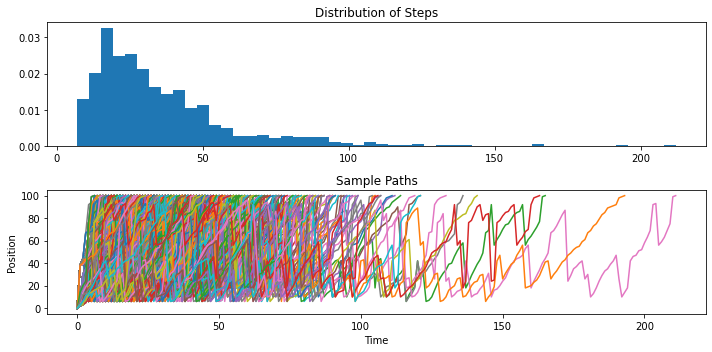

In [418]:
fig, ax = plt.subplots(2, 1, figsize=(10, 5))
ax[0].hist(steps, density=True, bins=50)
ax[0].set_title('Distribution of Steps')
for s in paths:
    s = [a.state.position for a in s]
    ax[1].plot(list(range(len(s))), s)
ax[1].set_title('Sample Paths')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Position')
fig.tight_layout()

#### e.

In [414]:
class SLReward(FiniteMarkovRewardProcess[StateSL]):
    def __init__(self):
        super().__init__(self.get_transition_reward_map())
    
    def get_transition_reward_map(self) -> Mapping[StateSL, FiniteDistribution[Tuple[StateSL, float]]]:
        d: Dict[StateSL, Categorical[Tuple[StateSL, float]]] = {}
        for state in non_terminal:
            state_probs_map: Mapping[Tuple[StateSL, float], float] = {}
            for s in list(nonterminal):
                states_probs_map = {
                    (StateSL(f(s + i)), 1): 1 / 6 for i in range(1, 7)
                }
                d[StateSL(s)] = Categorical(states_probs_map)
        return d

In [415]:
sl = SLReward()
SL_MRP.display_value_function(1)


{NonTerminal(state=StateSL(position=0)): 34.026,
 NonTerminal(state=StateSL(position=1)): 34.867,
 NonTerminal(state=StateSL(position=2)): 34.598,
 NonTerminal(state=StateSL(position=3)): 34.416,
 NonTerminal(state=StateSL(position=4)): 34.58,
 NonTerminal(state=StateSL(position=5)): 34.316,
 NonTerminal(state=StateSL(position=6)): 34.051,
 NonTerminal(state=StateSL(position=7)): 33.79,
 NonTerminal(state=StateSL(position=8)): 33.632,
 NonTerminal(state=StateSL(position=9)): 33.325,
 NonTerminal(state=StateSL(position=10)): 33.018,
 NonTerminal(state=StateSL(position=11)): 32.726,
 NonTerminal(state=StateSL(position=12)): 32.462,
 NonTerminal(state=StateSL(position=13)): 32.229,
 NonTerminal(state=StateSL(position=14)): 32.031,
 NonTerminal(state=StateSL(position=15)): 31.485,
 NonTerminal(state=StateSL(position=16)): 31.173,
 NonTerminal(state=StateSL(position=17)): 30.977,
 NonTerminal(state=StateSL(position=18)): 30.874,
 NonTerminal(state=StateSL(position=19)): 30.831,
 NonTerminal

34 rolls are expected.